In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
from celluloid import Camera
from matplotlib import cm
from hamiltonian_gas import HamiltonianGasSystem
from gas_dynamics import GasDynamics
import gas_potential
import gas_interaction

In [2]:
dimension: int = 2
num_particles: int = 5
box_size: float = 1.
half_box_size: float = box_size/2

In [3]:
coordinates = (np.random.rand(num_particles, dimension)/2)
momentums = 0*np.random.normal(0, 0.5, (num_particles, dimension))
# coordinates = np.array([
#     [0.21,0],
#     [-0.2, 0],
# ])
# momentums = np.array([
#     [-0.93, 0],
#     [0.93, 0],
# ])
coordinates, momentums

(array([[0.01377615, 0.0893793 ],
        [0.22243862, 0.08827703],
        [0.20327397, 0.19111197],
        [0.22395305, 0.22035358],
        [0.04807386, 0.21412345]]),
 array([[ 0.,  0.],
        [-0., -0.],
        [ 0., -0.],
        [ 0.,  0.],
        [ 0.,  0.]]))

In [5]:
gas = HamiltonianGasSystem(m=1,
                           outer_potential=gas_potential.SimpleQuadraticPotential(a=0.1),
                           interaction=gas_interaction.M1Interaction(r0=0.1, u0=0.1),
                          )
gas.initial_energy = gas.energy(coordinates, momentums)
print(gas.initial_energy)

0.9783868031292707


In [6]:
gas_dynamics = GasDynamics(gas.d_hamiltonian_d_coordinates, gas.d_hamiltonian_d_momentums, half_box_size)

In [16]:
p_t = [momentums]
r_t = [coordinates]
energy_t = [ gas.energy(r_t[-1], p_t[-1]) ]
kin_t = [gas.kinetic_energy(p_t[-1]) ]
t = [0]
dt = 2**-10
for i in range(20000):
    r, p = gas_dynamics.sie(r_t[-1], p_t[-1], dt)
    #print(f"pre: {r}, {p}")
    #p = gas.kinetic_energy_correction(gas.initial_energy, r, p)
    #print(f"post: {r}, {p}")
    gas_dynamics.walls(r, p)
    
    t.append(t[-1] + dt)
    r_t.append(r)
    p_t.append(p)
    kin_t.append(gas.kinetic_energy(p_t[-1]))
    energy_t.append(gas.energy(r_t[-1], p_t[-1]) )


p_t = np.array(p_t)
r_t = np.array(r_t)
energy_t = np.array(energy_t)
kin_t = np.array(kin_t)
t = np.array(t)

In [17]:
r_t[0]

array([[0.01377615, 0.0893793 ],
       [0.22243862, 0.08827703],
       [0.20327397, 0.19111197],
       [0.22395305, 0.22035358],
       [0.04807386, 0.21412345]])

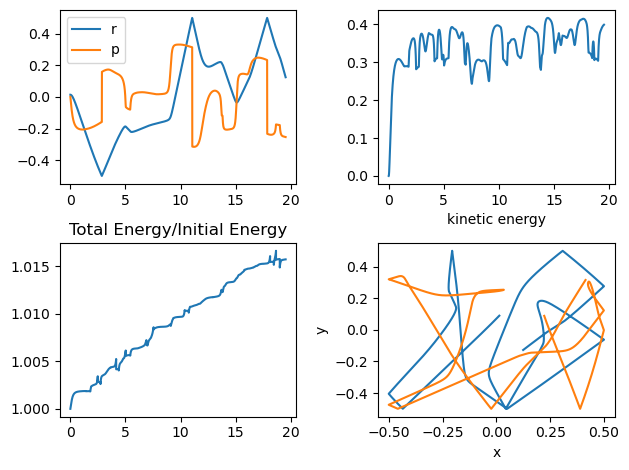

In [20]:


fig, ax = plt.subplots(2,2)
ax[0,0].plot(t, r_t[:,0,0], label='r' )
ax[0,0].plot(t, p_t[:,0,0], label='p' )
ax[0,0].legend()
ax[1,0].plot(t, energy_t/gas.initial_energy)
ax[1,0].set_title('Total Energy/Initial Energy')

ax[0,1].plot(t, kin_t)
ax[0,1].set_xlabel('time')
ax[0,1].set_xlabel('kinetic energy')


ax[1,1].plot([r[0][0] for r in r_t], [r[0][1] for r in r_t])
ax[1,1].plot([r[1][0] for r in r_t], [r[1][1] for r in r_t])

ax[1,1].set_xlabel("x")
ax[1,1].set_ylabel("y")

fig.tight_layout()

In [12]:
r_t[0]

array([[0.01377615, 0.0893793 ],
       [0.22243862, 0.08827703],
       [0.20327397, 0.19111197],
       [0.22395305, 0.22035358],
       [0.04807386, 0.21412345]])

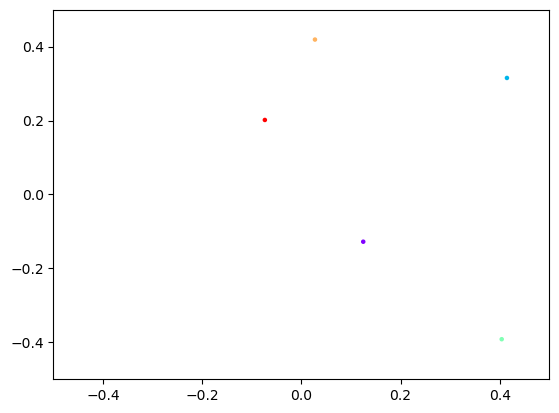

In [11]:
colors = cm.rainbow(np.linspace(0, 1, num_particles))
camera = Camera(plt.figure())
for r in r_t[::8]:
    plt.scatter(*r.T, c=colors, s=5)
    plt.xlim([-half_box_size,half_box_size])
    plt.ylim([-half_box_size, half_box_size])
    camera.snap()
anim = camera.animate(blit=True)
anim.save('scatter.mp4', fps = 40)

(array([[ 9708., 11009., 10761., 12101., 11101., 10821., 12123., 11477.,
          9253., 11460.],
        [ 9948.,  8603.,  6816.,  8543.,  7979., 10597., 10477.,  9393.,
         10306.,  9463.],
        [ 9560.,  8638., 10264.,  8814.,  9963.,  8955.,  9264.,  9247.,
          9132.,  7026.],
        [13324.,  8837., 10309.,  7957.,  6820.,  9739.,  9951.,  9195.,
          9703.,  8656.],
        [10519.,  8153., 10367.,  9114.,  9757.,  9701.,  9227.,  8355.,
          9941., 10001.],
        [10724.,  9447., 12218.,  9426.,  9454., 10037.,  9760.,  9495.,
         11640., 11241.],
        [10308.,  8935.,  8445.,  9417.,  7734.,  8536.,  9015.,  9681.,
         10957.,  9600.],
        [12057.,  9912.,  7037.,  9329.,  7883.,  9763., 11266., 10698.,
         10205., 11397.],
        [12200., 11742., 12490.,  8750.,  9149., 11220., 11584.,  8028.,
         11089., 13418.],
        [12256., 11430.,  9612.,  9055., 11476., 10464., 11233., 11771.,
         12920., 12118.]]),
 array([

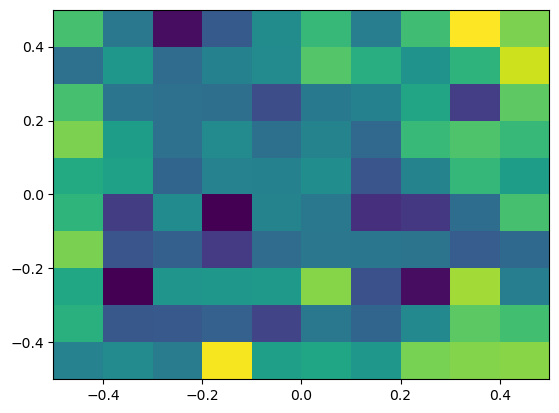

In [237]:
plt.hist2d(np.concatenate( [r[:,0] for r in r_t] ), np.concatenate( [r[:,1] for r in r_t] ))